## Objective

To Predict the customers who are about to churn from a telecom operator<br>
Business Objective is to predict the High Value Customers only<br>
We need to predict Churn on the basis of Action Period (Churn period data needs to be deleted after labelling)<br>
Churn would be based on Usage<br>
Requirement:<br>
1) Churn Prediction Model <br>
2) Best Predictor Variables <br>

## Approach

1) Data Understanding & Cleaning <br>
2) EDA <br>
3) Derived Metrics <br>
4) Dimensionality Reduction using PCA <br>
5) Classification models to predict Churn (Use various Models & Handle class imbalance) <br>
6) Model Evaluation <br>
7) Prepare Model for Predictor variables selection (Prepare multiple models & choose the best one) <br>
8) Summarize <br>

In [1234]:
# Importing the required Librarires

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [1235]:
# Reading the dataset
df=pd.read_csv("telecom_churn_data.csv")
#lets take a look on data 
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [1236]:
print("There are total %d columns." %df.shape[1])
print("There are total %d observations." %df.shape[0])

There are total 226 columns.
There are total 99999 observations.


> **In churn prediction, we assume that there are three phases of customer lifecycle :**
- The ‘good’ phase [Month 6 & 7]
- The ‘action’ phase [Month 8]
- The ‘churn’ phase [Month 9]

> In this case, since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

## Data Understanding & Cleaning

In [1237]:
#Lets look more into attributes and stats of dataset
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [1238]:
#As we can see last 4 columns of above dataset has month name as part of their name lets make it 
#similar to other column standard
df = df.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'})
#lets get all the column names
for col in df.columns:
    print(col)

mobile_number
circle_id
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
last_date_of_month_9
arpu_6
arpu_7
arpu_8
arpu_9
onnet_mou_6
onnet_mou_7
onnet_mou_8
onnet_mou_9
offnet_mou_6
offnet_mou_7
offnet_mou_8
offnet_mou_9
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_ic_mou_9
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
roam_og_mou_9
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2t_mou_9
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2m_mou_9
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2f_mou_9
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_t2c_mou_9
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
loc_og_mou_9
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2t_mou_9
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2m_mou_9
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_t2f_mou_9
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_og_t2c_mou_9
std_og_mou_

In [1239]:
# Let us first extract list of columns containing recharge amount
# Fetching all recharge columns
col_rech=[]
for col in list(df.columns):
    if ('rech' in col and 'date' not in col):
        col_rech.append(col)
col_rech

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

In [1240]:
df.loc[:,col_rech].describe()

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
mean,7.558806,7.700367,7.212912,6.893019,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,107.728207,101.943889,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,192.600982,200.981292,197.526489,192.734315
std,7.078405,7.070422,7.203753,7.096261,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,126.902505,125.375109,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,192.646318,196.791224,191.301305,188.400286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.500000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,30.000000,28.000000,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,82.000000,92.000000,87.000000,69.000000
50%,6.000000,6.000000,5.000000,5.000000,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,98.000000,61.000000,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,154.000000,154.000000,154.000000,164.000000
75%,9.000000,10.000000,9.000000,9.000000,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,144.000000,144.000000,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,252.000000,252.000000,252.000000,252.000000
max,307.000000,138.000000,196.000000,131.000000,35190.000000,40335.000000,45320.000000,37235.000000,4010.000000,4010.000000,4449.000000,3399.000000,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.00000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,7546.000000,4365.000000,4076.000000,4061.000000


In [1241]:
#lets get the all null values of all columns in percentage, it would be better to look in terms of percentage
print("Total Null Values in percentage:\n")
(100*(df.loc[:,col_rech].isnull().sum())/len(df.index))

Total Null Values in percentage:



total_rech_num_6       0.000000
total_rech_num_7       0.000000
total_rech_num_8       0.000000
total_rech_num_9       0.000000
total_rech_amt_6       0.000000
total_rech_amt_7       0.000000
total_rech_amt_8       0.000000
total_rech_amt_9       0.000000
max_rech_amt_6         0.000000
max_rech_amt_7         0.000000
max_rech_amt_8         0.000000
max_rech_amt_9         0.000000
total_rech_data_6     74.846748
total_rech_data_7     74.428744
total_rech_data_8     73.660737
total_rech_data_9     74.077741
max_rech_data_6       74.846748
max_rech_data_7       74.428744
max_rech_data_8       73.660737
max_rech_data_9       74.077741
count_rech_2g_6       74.846748
count_rech_2g_7       74.428744
count_rech_2g_8       73.660737
count_rech_2g_9       74.077741
count_rech_3g_6       74.846748
count_rech_3g_7       74.428744
count_rech_3g_8       73.660737
count_rech_3g_9       74.077741
av_rech_amt_data_6    74.846748
av_rech_amt_data_7    74.428744
av_rech_amt_data_8    73.660737
av_rech_

**Analysis:** We can see more then **74%** values for **recharge** related data are missing.

**Analysis:** As the minimum value is 1 we can impute the NA values by 0, Considering there were no recharges done by the customer.

In [1242]:
# Imputing zeroes for all recharge columns
df[col_rech]=df[col_rech].apply(lambda x: x.fillna(0))

In [1243]:
#lets check for null values
df[col_rech].isnull().sum()

total_rech_num_6      0
total_rech_num_7      0
total_rech_num_8      0
total_rech_num_9      0
total_rech_amt_6      0
total_rech_amt_7      0
total_rech_amt_8      0
total_rech_amt_9      0
max_rech_amt_6        0
max_rech_amt_7        0
max_rech_amt_8        0
max_rech_amt_9        0
total_rech_data_6     0
total_rech_data_7     0
total_rech_data_8     0
total_rech_data_9     0
max_rech_data_6       0
max_rech_data_7       0
max_rech_data_8       0
max_rech_data_9       0
count_rech_2g_6       0
count_rech_2g_7       0
count_rech_2g_8       0
count_rech_2g_9       0
count_rech_3g_6       0
count_rech_3g_7       0
count_rech_3g_8       0
count_rech_3g_9       0
av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
av_rech_amt_data_9    0
dtype: int64

### 1.  Derive new features

In [1244]:
#lets sum up all types of data recharge in the month
df['total_rech_num_data_6'] = (df['count_rech_2g_6']+df['count_rech_3g_6']).astype(int)
df['total_rech_num_data_7'] = (df['count_rech_2g_7']+df['count_rech_3g_7']).astype(int)
df['total_rech_num_data_8'] = (df['count_rech_2g_8']+df['count_rech_3g_8']).astype(int)

In [1245]:
#lets calculate total amount spent on recharging data(mobile internet) in the month
#multiply amount with number of times it was recharged for data 
df['total_rech_amt_data_6'] = df['total_rech_num_data_6']*df['av_rech_amt_data_6']
df['total_rech_amt_data_7'] = df['total_rech_num_data_7']*df['av_rech_amt_data_7']
df['total_rech_amt_data_8'] = df['total_rech_num_data_8']*df['av_rech_amt_data_8']

In [1246]:
#lets calculate total monthly recharge for data and call, so sum amounts spents on call and data recharge for the month.
df['total_month_rech_6'] = df['total_rech_amt_6']+df['total_rech_amt_data_6']
df['total_month_rech_7'] = df['total_rech_amt_7']+df['total_rech_amt_data_7']
df['total_month_rech_8'] = df['total_rech_amt_8']+df['total_rech_amt_data_8']

### 2. Filter high-value customers

In [1247]:
#lets extract high value customers based on the average recharge amount in the first two months(6,7) (the good phase).
hv_cust=df[df[['total_month_rech_6','total_month_rech_7']].mean(axis=1)> df[['total_month_rech_6','total_month_rech_7']].mean(axis=1).quantile(0.7)]

In [1248]:
#lets get the number of features and observations in new dataset high value customers
#hv_cust.info()
print("There are total %d features." %hv_cust.shape[1])
print("There are total %d observations." %hv_cust.shape[0])

There are total 235 features.
There are total 29953 observations.


##### As asked in problem statement, after picking high values customers we have got 29.9K observations. Lets proceed further

### 3. Tag churners and remove attributes of the churn phase

In [1249]:
col1 = ['vol_3g_mb_9', 'vol_2g_mb_9','total_ic_mou_9','total_og_mou_9']
hv_cust['churn']=hv_cust[col1].apply(lambda x: 1 if ((x['vol_3g_mb_9']==0) & (x['vol_2g_mb_9']==0.0) & (x['total_ic_mou_9']==0)  & (x['total_og_mou_9']==0)) else 0, axis=1)

In [1250]:
print("Total number of customers churned is:",len(hv_cust[hv_cust['churn']==1]))
print("Total number of customers non-churned is:",len(hv_cust[hv_cust['churn']==0]))

Total number of customers churned is: 2433
Total number of customers non-churned is: 27520


In [1251]:
#Lets take a look on stats
hv_cust.shape

(29953, 236)

In [1252]:
# let us check what's the % of churned customers
100*hv_cust.churn.sum()/len(hv_cust)

8.122725603445398

In [1253]:
#After tagging churners, remove all the attributes corresponding to the churn phase
#(all attributes having ‘ _9’, etc. in their names).
import re
#filter all columns where last char in column name is _9
col2 = hv_cust.filter(regex=('_9')).columns
#drop these columns as mentioned
hv_cust.drop(col2,axis=1,inplace=True)

In [1254]:
#lets get the number of features and observations in new dataset high value customers
#hv_cust.info()
print("Total features.",hv_cust.shape[1])
print("Total observations.",hv_cust.shape[0])

Total features. 181
Total observations. 29953


In [1255]:
hv_cust.head(5)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_month_rech_6,total_month_rech_7,total_month_rech_8,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,1,1,1,252.0,252.0,252.0,614.0,504.0,504.0,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,21

# EDA

**Analysis:** We are getting more then 40% values are not available for count of recharge and average revenue for 2G/3G per user. 
Although we have 2G/3G volume usage based data available, we can drop these columns.

In [1256]:
# Since we have total count of recharge for each month for Data (2G & 3G) we can drop below features.
hv_cust.drop(['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7',
              'count_rech_3g_8','arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8'
               ],axis=1,inplace=True)

In [1257]:
# Since we have total recharge amount for each month for Data (2G & 3G) we can drop below features.
hv_cust.drop(['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8'],axis=1,inplace=True)

In [1258]:
#Lets look into few more features. Circle id and mobile number can be dropped from the list.
# circle id has only one value so drop it. mobile number has not much importance in our analysis
hv_cust.circle_id.value_counts()
hv_cust.drop(['circle_id','mobile_number'],axis=1,inplace=True)

In [1259]:
hv_cust.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_month_rech_6,total_month_rech_7,total_month_rech_8,churn
count,29730.0,29730.0,29730.0,29953.000000,29953.000000,29953.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.00000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.0,29417.0,28781.0,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29953.000000,29953.000000,29953.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.00000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.0,29417.0,28781.0,29411.000000,29417.00000,28781.000000,29953.000000,29953.000000,29953.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,16740.000000,17038.000000,15935.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,

In [1260]:
#Lets look into columns which have only values as 0 as we looked into stats thru describe

print(hv_cust['loc_og_t2o_mou'].unique())
print(hv_cust['std_og_t2o_mou'].unique())
print(hv_cust['loc_ic_t2o_mou'].unique())
print(hv_cust['std_og_t2c_mou_6'].unique())
print(hv_cust['std_og_t2c_mou_7'].unique())
print(hv_cust['std_og_t2c_mou_8'].unique())
print(hv_cust['std_ic_t2o_mou_6'].unique())
print(hv_cust['std_ic_t2o_mou_7'].unique())
print(hv_cust['std_ic_t2o_mou_8'].unique())

[ 0. nan]
[ 0. nan]
[ 0. nan]
[nan  0.]
[nan  0.]
[ 0. nan]
[nan  0.]
[nan  0.]
[ 0. nan]


In [1261]:
#lets drop all above columns from dataset
hv_cust.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'],inplace=True,axis=1)

In [1262]:
#lets get columns which have more than 3% missing values
def nullvalue(cutoff):
    null = (100*(hv_cust.isnull().sum())/len(hv_cust.index))
    print("{} features have more than {}% null values".format(len(null.loc[null > cutoff]),cutoff))
    return null.loc[null > cutoff]
nullvalue(3)

36 features have more than 3% null values


onnet_mou_8                  3.912797
offnet_mou_8                 3.912797
roam_ic_mou_8                3.912797
roam_og_mou_8                3.912797
loc_og_t2t_mou_8             3.912797
loc_og_t2m_mou_8             3.912797
loc_og_t2f_mou_8             3.912797
loc_og_t2c_mou_8             3.912797
loc_og_mou_8                 3.912797
std_og_t2t_mou_8             3.912797
std_og_t2m_mou_8             3.912797
std_og_t2f_mou_8             3.912797
std_og_mou_8                 3.912797
isd_og_mou_8                 3.912797
spl_og_mou_8                 3.912797
og_others_8                  3.912797
loc_ic_t2t_mou_8             3.912797
loc_ic_t2m_mou_8             3.912797
loc_ic_t2f_mou_8             3.912797
loc_ic_mou_8                 3.912797
std_ic_t2t_mou_8             3.912797
std_ic_t2m_mou_8             3.912797
std_ic_t2f_mou_8             3.912797
std_ic_mou_8                 3.912797
spl_ic_mou_8                 3.912797
isd_ic_mou_8                 3.912797
ic_others_8 

In [1263]:
#Lets drop these 3 date columns which have more than 40% values as null.
#they don't see to much imporatnt as we already have date columns 
hv_cust.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],inplace=True,axis=1)

In [1264]:
# lets Convert dtype of date columns to datetime
hv_cust['last_date_of_month_6'] = pd.to_datetime(hv_cust['last_date_of_month_6'], format='%m/%d/%Y')
hv_cust['last_date_of_month_7'] = pd.to_datetime(hv_cust['last_date_of_month_7'], format='%m/%d/%Y')
hv_cust['last_date_of_month_8'] = pd.to_datetime(hv_cust['last_date_of_month_8'], format='%m/%d/%Y')
hv_cust['date_of_last_rech_6'] = pd.to_datetime(hv_cust['date_of_last_rech_6'], format='%m/%d/%Y')
hv_cust['date_of_last_rech_7'] = pd.to_datetime(hv_cust['date_of_last_rech_7'], format='%m/%d/%Y')
hv_cust['date_of_last_rech_8'] = pd.to_datetime(hv_cust['date_of_last_rech_8'], format='%m/%d/%Y')

In [1265]:
missing3 = list(nullvalue(3).index)
missing3

33 features have more than 3% null values


['onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

In [1266]:
#Lets impute all these columns with '0' as they look important for model building
hv_cust[missing3]=hv_cust[missing3].replace(np.nan, 0)

In [1267]:
nullvalue(0)

59 features have more than 0% null values


last_date_of_month_7    0.090141
last_date_of_month_8    0.550863
onnet_mou_6             1.809502
onnet_mou_7             1.789470
offnet_mou_6            1.809502
offnet_mou_7            1.789470
roam_ic_mou_6           1.809502
roam_ic_mou_7           1.789470
roam_og_mou_6           1.809502
roam_og_mou_7           1.789470
loc_og_t2t_mou_6        1.809502
loc_og_t2t_mou_7        1.789470
loc_og_t2m_mou_6        1.809502
loc_og_t2m_mou_7        1.789470
loc_og_t2f_mou_6        1.809502
loc_og_t2f_mou_7        1.789470
loc_og_t2c_mou_6        1.809502
loc_og_t2c_mou_7        1.789470
loc_og_mou_6            1.809502
loc_og_mou_7            1.789470
std_og_t2t_mou_6        1.809502
std_og_t2t_mou_7        1.789470
std_og_t2m_mou_6        1.809502
std_og_t2m_mou_7        1.789470
std_og_t2f_mou_6        1.809502
std_og_t2f_mou_7        1.789470
std_og_mou_6            1.809502
std_og_mou_7            1.789470
isd_og_mou_6            1.809502
isd_og_mou_7            1.789470
spl_og_mou

In [1268]:
#Lets look into date columns for unique values.
hv_cust['date_of_last_rech_6'].unique()
hv_cust['date_of_last_rech_7'].unique()
hv_cust['date_of_last_rech_8'].unique()

array(['2014-08-08T00:00:00.000000000', '2014-08-26T00:00:00.000000000',
       '2014-08-30T00:00:00.000000000', '2014-08-31T00:00:00.000000000',
       '2014-08-24T00:00:00.000000000', '2014-08-28T00:00:00.000000000',
       '2014-08-23T00:00:00.000000000', '2014-08-02T00:00:00.000000000',
       '2014-08-27T00:00:00.000000000', '2014-08-21T00:00:00.000000000',
       '2014-08-29T00:00:00.000000000', '2014-08-25T00:00:00.000000000',
       '2014-08-17T00:00:00.000000000', '2014-08-22T00:00:00.000000000',
       '2014-08-19T00:00:00.000000000',                           'NaT',
       '2014-08-15T00:00:00.000000000', '2014-08-09T00:00:00.000000000',
       '2014-08-20T00:00:00.000000000', '2014-08-01T00:00:00.000000000',
       '2014-08-06T00:00:00.000000000', '2014-08-10T00:00:00.000000000',
       '2014-08-16T00:00:00.000000000', '2014-08-12T00:00:00.000000000',
       '2014-08-07T00:00:00.000000000', '2014-08-11T00:00:00.000000000',
       '2014-08-13T00:00:00.000000000', '2014-08-18

In [1269]:
# they all have dates for only one month in all their rows. that means rechrge was done in that particular month.
# we will just impute a particular date of that month for all those null value rows.

#Filling null values with the previous ones
hv_cust['date_of_last_rech_6'].fillna(method ='pad',inplace=True) 
hv_cust['date_of_last_rech_7'].fillna(method ='pad',inplace=True) 
hv_cust['date_of_last_rech_8'].fillna(method ='pad',inplace=True) 

In [1270]:
#Lets look into date columns for unique values.
hv_cust['last_date_of_month_7'].unique()
hv_cust['last_date_of_month_8'].unique()

array(['2014-08-31T00:00:00.000000000',                           'NaT'],
      dtype='datetime64[ns]')

In [1271]:
# they all have same dates for the month in all their rows and null values for few.
# we will just impute a particular same date of that month for all those null value rows.
#Filling null values with the previous ones in the dataset
hv_cust['last_date_of_month_7'].fillna(method ='pad',inplace=True) 
hv_cust['last_date_of_month_8'].fillna(method ='pad',inplace=True) 

In [1272]:
#now we have 54 columns which have null values which have almost same percentage of null values
#also we can notice that all these columns belong to 6th and 7th month so lets impute these columsn with 0s.
#lets get all the columns with null values as they are important for our analysis.
missing0 = list(nullvalue(0).index)
missing0

54 features have more than 0% null values


['onnet_mou_6',
 'onnet_mou_7',
 'offnet_mou_6',
 'offnet_mou_7',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_mou_6',
 'std_og_mou_7',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'og_others_6',
 'og_others_7',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'std_ic_t2t_mou_6',
 'std_ic_t2t_mou_7',
 'std_ic_t2m_mou_6',
 'std_ic_t2m_mou_7',
 'std_ic_t2f_mou_6',
 'std_ic_t2f_mou_7',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'spl_ic_mou_6',
 'spl_ic_mou_7',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'ic_others_

In [1273]:
#Lets impute all these columns with '0' as they look important for model building
hv_cust[missing0]=hv_cust[missing0].replace(np.nan, 0)

In [1274]:
#we have taken care of all null values.
print("Total features.",hv_cust.shape[1])
print("Total observations.",hv_cust.shape[0])

Total features. 152
Total observations. 29953


## Exploratory Data Analysis(EDA):

In [1275]:
# create box plot for  6th, 7th and 8th month
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = hv_cust
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.show()
   

### a. Recharge amount related variables

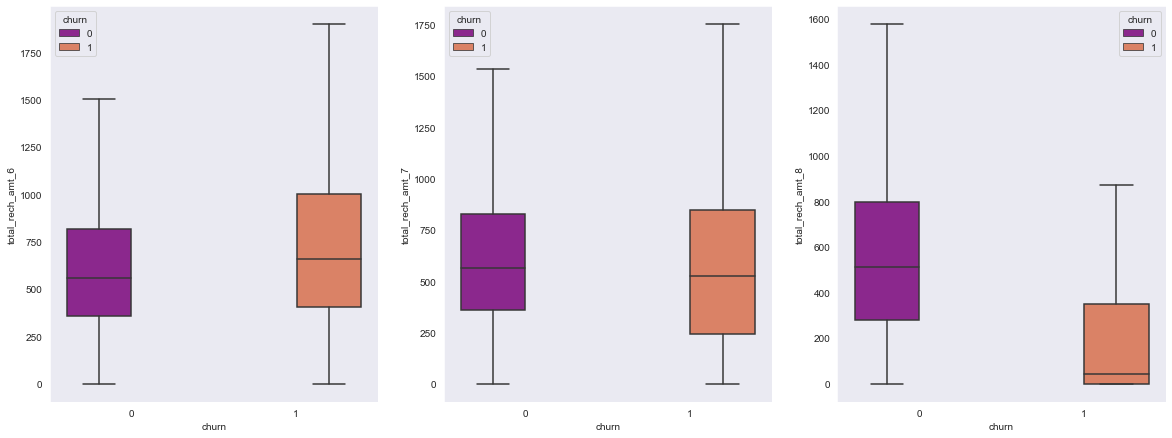

In [1276]:
recharge_amnt_columns =  hv_cust.columns[hv_cust.columns.str.contains('rech_amt')]

# Ploting for total recharge amount:
plot_box_chart('total_rech_amt')

**Analysis:** We can see a drop in the total recharge amount for churned customers in the 8th Month (Action Phase).

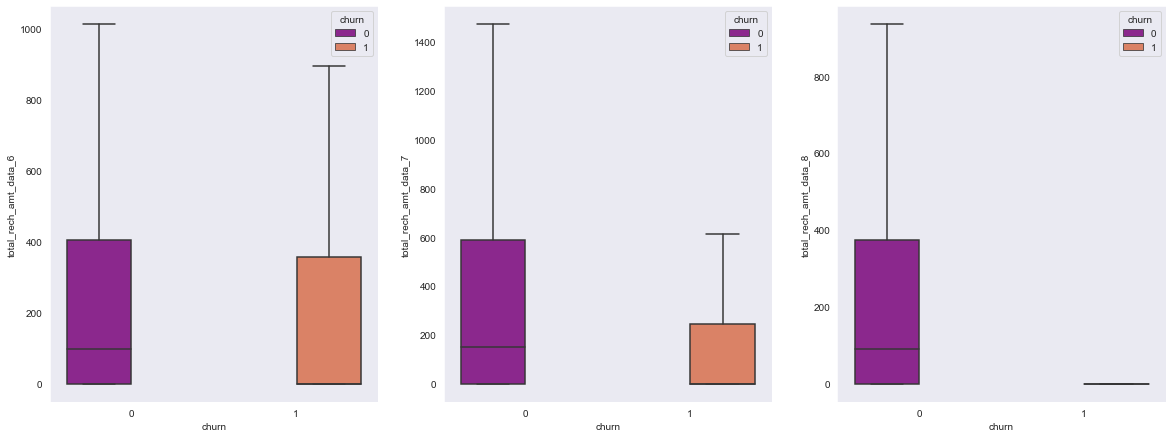

In [1277]:
# Ploting for total recharge amount for data:
plot_box_chart('total_rech_amt_data')

**Analysis:** We can see that there is a huge drop in total recharge amount for data in the 8th month (action phase) for churned customers.

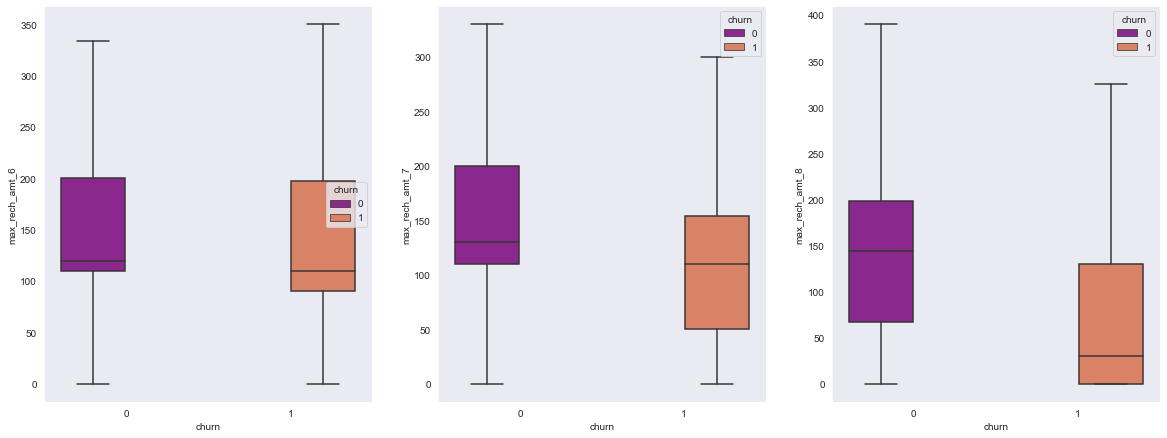

In [1278]:
# Ploting for maximum recharge amount for data:
plot_box_chart('max_rech_amt')

**Analysis:** We can see that there is a huge drop in maximum recharge amount for data in the 8th month (action phase) for churned customers.

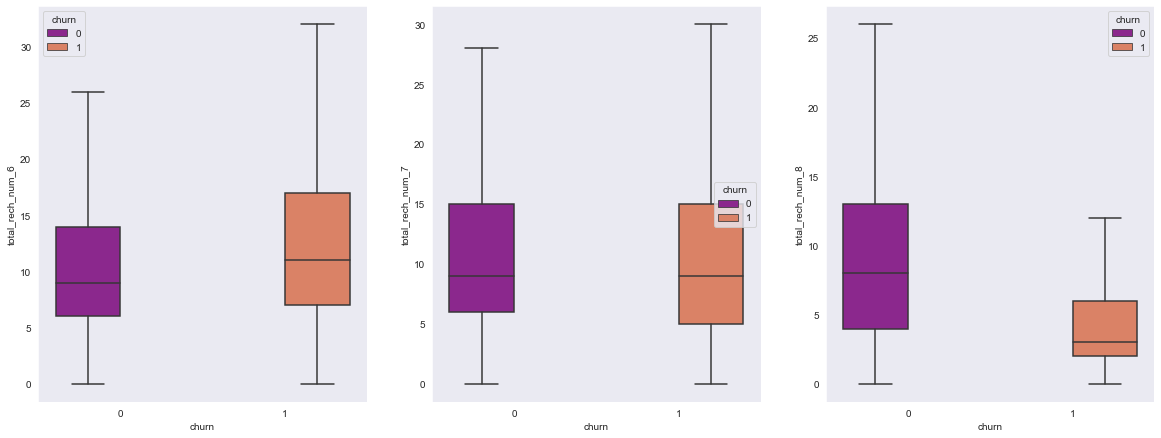

In [1279]:
# Ploting for Total recharge for Number:
plot_box_chart('total_rech_num')

**Analysis:** We can see that there is a huge drop in total recharge number also in the 8th month (action phase) for churned customers.

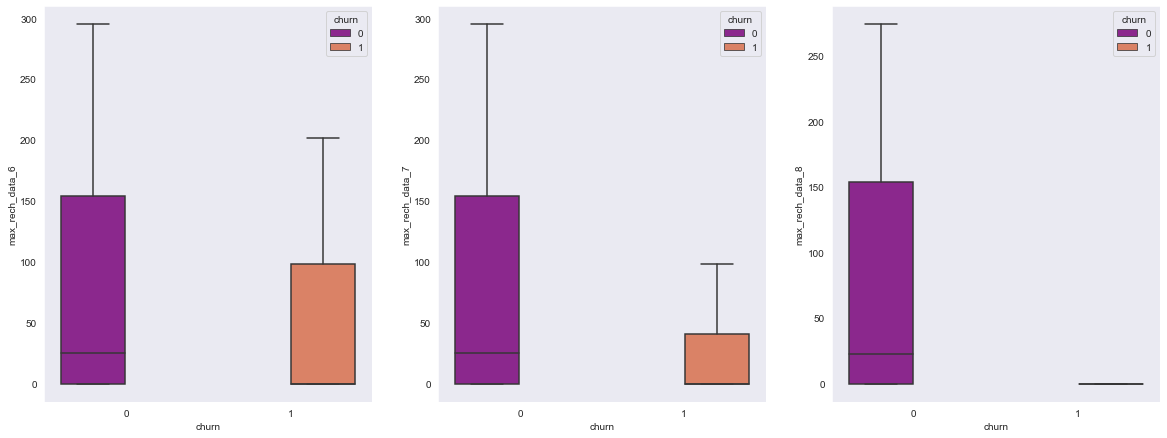

In [1280]:
# Ploting for maximum recharge for data:
plot_box_chart('max_rech_data')

**Analysis:** We can see that there is a huge drop in maximum recharge for data also in the 8th month (action phase) for churned customers.

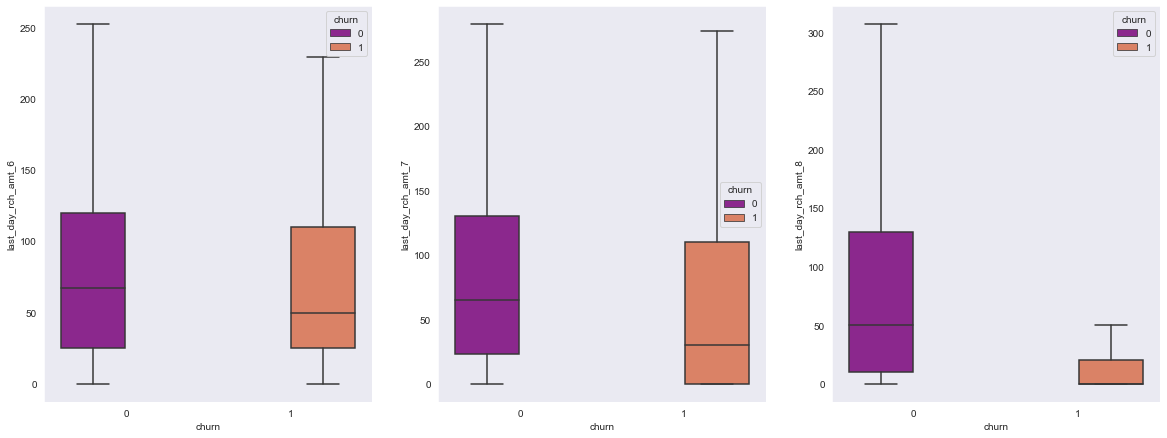

In [1281]:
#Getting the last day recharge amount columns
last_day_rech_amt = hv_cust.columns[hv_cust.columns.str.contains('day')]
# Ploting for last day recharge amount:
plot_box_chart('last_day_rch_amt')

**Analysis:** We are getting a huge drop in 8th month recharge amount for churned customers.

#### b. 2G and 3G usage related attributes

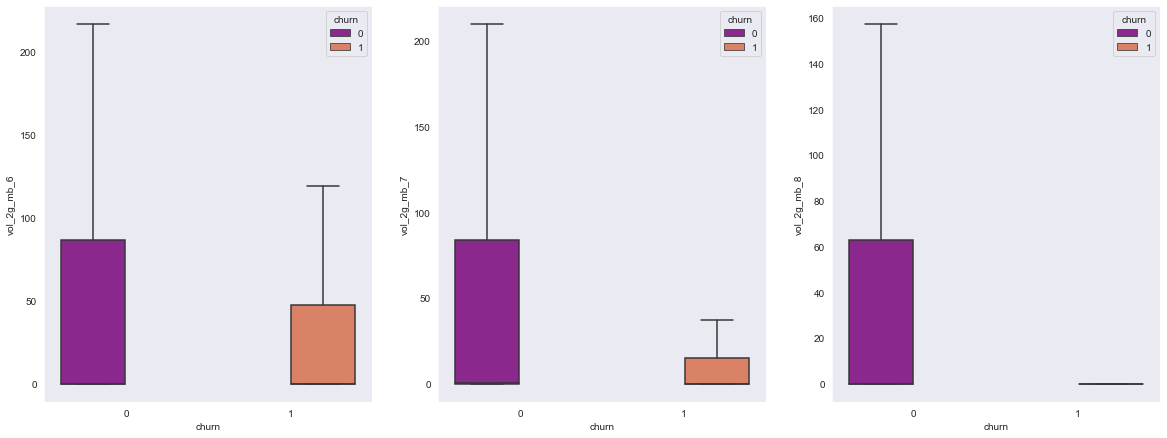

In [1282]:
# Ploting for volume of 2G and 3G usage columns:
plot_box_chart('vol_2g_mb')

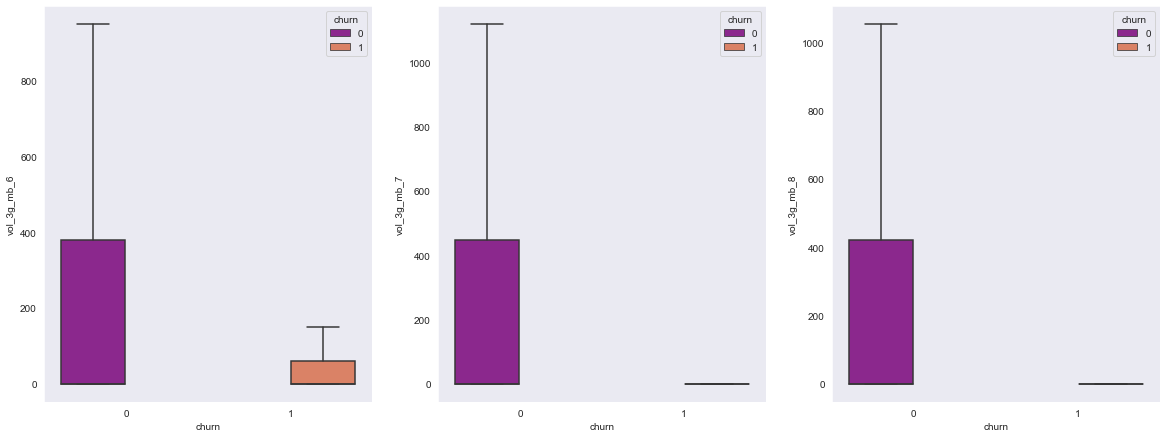

In [1283]:
plot_box_chart('vol_3g_mb')

**Analysis:** We have two observations from above: <br> 1) 2G and 3G usage for churned customers drops in 8th month<br>
2) We also see that 2G/3G usage is higher for non-churned customers indicating that churned customers might be from areas where 2G/3G service is not properly available.</span>

In [1284]:
# let's check monthly 2G/3G service schemes
monthly_subcription_2g_3g = hv_cust.columns[hv_cust.columns.str.contains('monthly_2g|monthly_3g',regex=True)]
monthly_subcription_2g_3g.tolist()

['monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8']

In [1285]:
def plot_mean_bar_chart(df,columns_list):
    df_0 = df[df.churn==0].filter(columns_list)
    df_1 = df[df.churn==1].filter(columns_list)

    mean_df_0 = pd.DataFrame([df_0.mean()],index={'Non Churn'})
    mean_df_1 = pd.DataFrame([df_1.mean()],index={'Churn'})

    frames = [mean_df_0, mean_df_1]
    mean_bar = pd.concat(frames)

    mean_bar.T.plot.bar(figsize=(10,5),rot=0)
    plt.show()
    
    return mean_bar

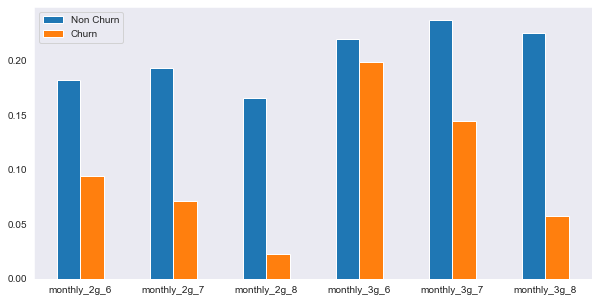

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
Non Churn,0.181613,0.193096,0.165080,0.219840,0.236882,0.224891
Churn,0.093711,0.071106,0.023017,0.198109,0.144266,0.057131


In [1286]:
plot_mean_bar_chart(hv_cust, monthly_subcription_2g_3g)

**Analysis:** Again we can see a drop in monthly subscription for churned customers in 8th Month.

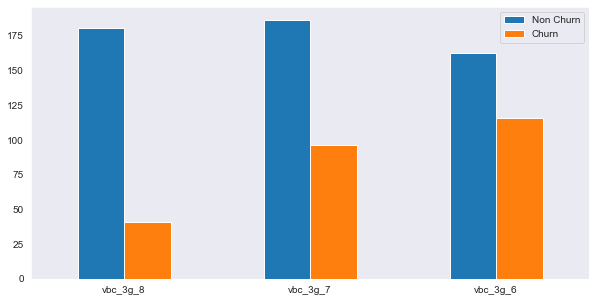

,vbc_3g_8,vbc_3g_7,vbc_3g_6
Non Churn,180.622636,186.370503,162.557305
Churn,40.940884,96.340707,115.461780


In [1287]:
vbc_column = hv_cust.columns[hv_cust.columns.str.contains('vbc_3g',regex=True)]
plot_mean_bar_chart(hv_cust, vbc_column)

**Analysis:** Significantly it showing that volume based cost for 3G is much lower for Churned customers as compared to Non-Churned Customers and also there is a drop in vbc in 8th month

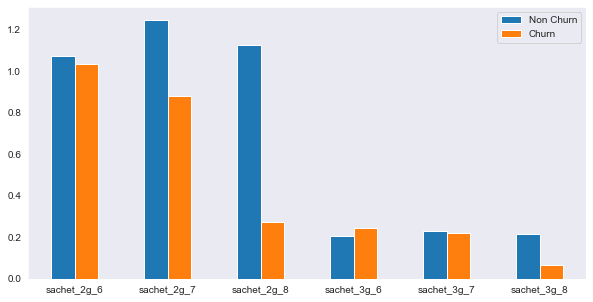

,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8
Non Churn,1.070531,1.245203,1.125145,0.206577,0.228307,0.214571
Churn,1.032470,0.879984,0.270859,0.244554,0.221948,0.065351


In [1288]:
# Checking Service schemes with validity smaller than a month for 2G/3G
SC_2g_or_3g_col = hv_cust.columns[hv_cust.columns.str.contains('sachet_2g|sachet_3g',regex=True)]
plot_mean_bar_chart(hv_cust, SC_2g_or_3g_col)

**Analysis:** We can see the drop in sachet services in 8th month for churned cutsomers

### C. Average Revenue Per User

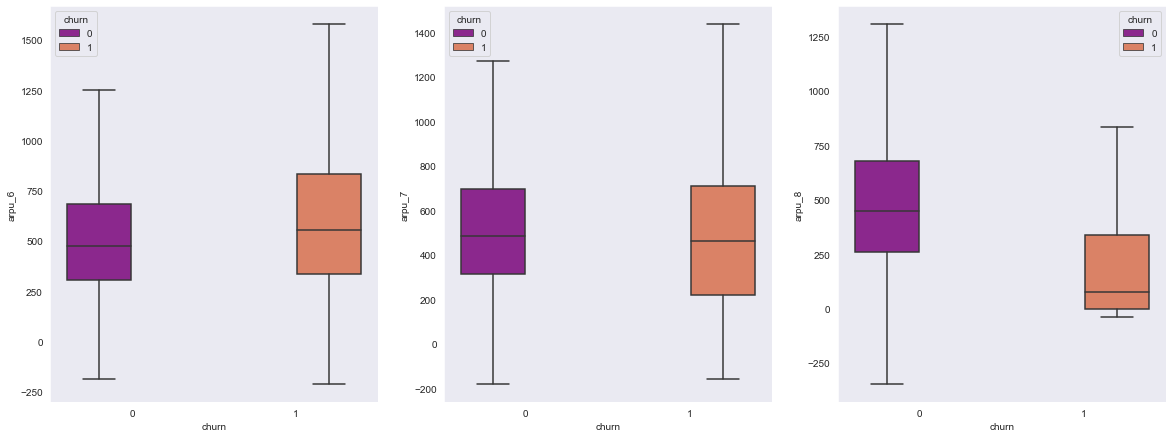

In [1289]:
# Checking columns for average revenue per user
arpu_cols = hv_cust.columns[hv_cust.columns.str.contains('arpu_')]

# Plotting arpu
plot_box_chart('arpu')

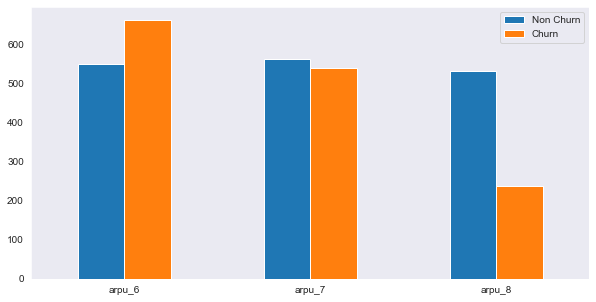

,arpu_6,arpu_7,arpu_8
Non Churn,549.546959,562.929990,532.869746
Churn,663.709368,541.146131,237.655478


In [1290]:
plot_mean_bar_chart(hv_cust, arpu_cols)

**Analysis:** We can see that huge drops for Arpu in 8th month for churned customers

### d. Minutes of usage - voice calls

In [1291]:
mou_cols = hv_cust.columns[hv_cust.columns.str.contains('mou')]
mou_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'loc_

In [1292]:
def heatmap(x,y,dataframe):
    plt.figure(figsize=(x,y))
    sns.heatmap(dataframe.corr(),cmap="OrRd",annot=True)
    plt.show()

In [1293]:
mou_og_cols6 = hv_cust.columns[hv_cust.columns.str.contains('.*_og_.*mou_6',regex=True)]

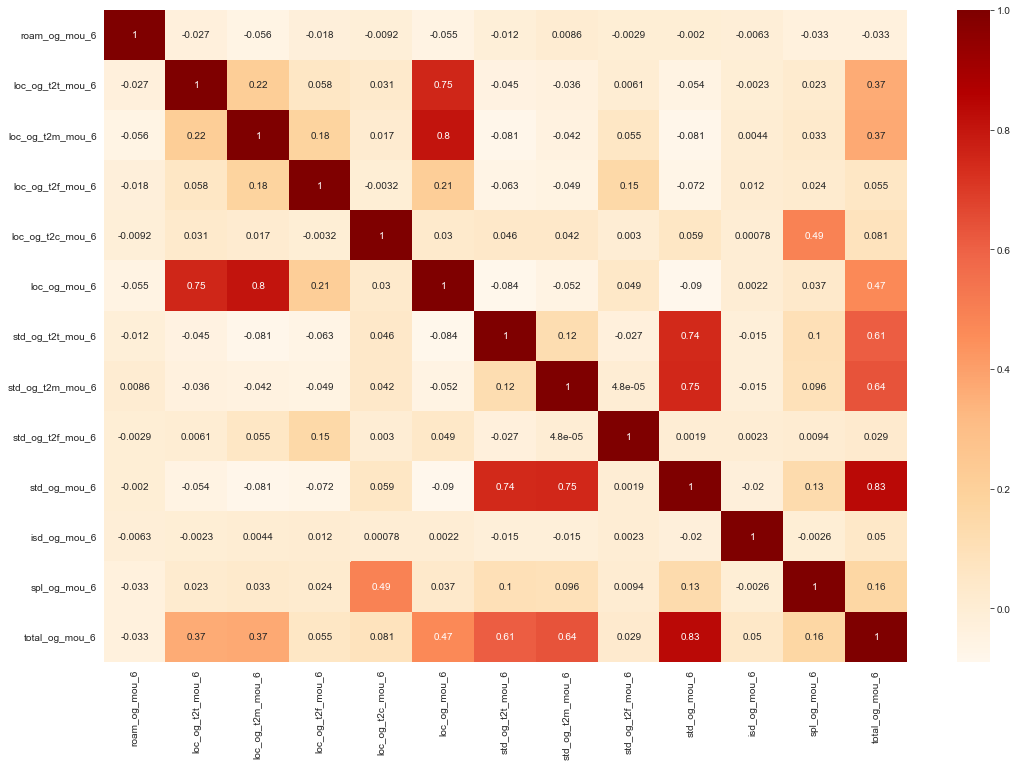

In [1294]:
heatmap(18,12,hv_cust.filter(mou_og_cols6))

**Analysis:** We can see that total_og_mou_6, std_og_mou_6 and loc_og_mou_6 is a combination of other variables present in dataset.So we can remove these columns for all months from the data set

In [1295]:
list_total_og_cols = hv_cust.columns[hv_cust.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]
hv_cust.drop(list_total_og_cols,axis=1,inplace=True)

> **Checking for incoming mou variables**

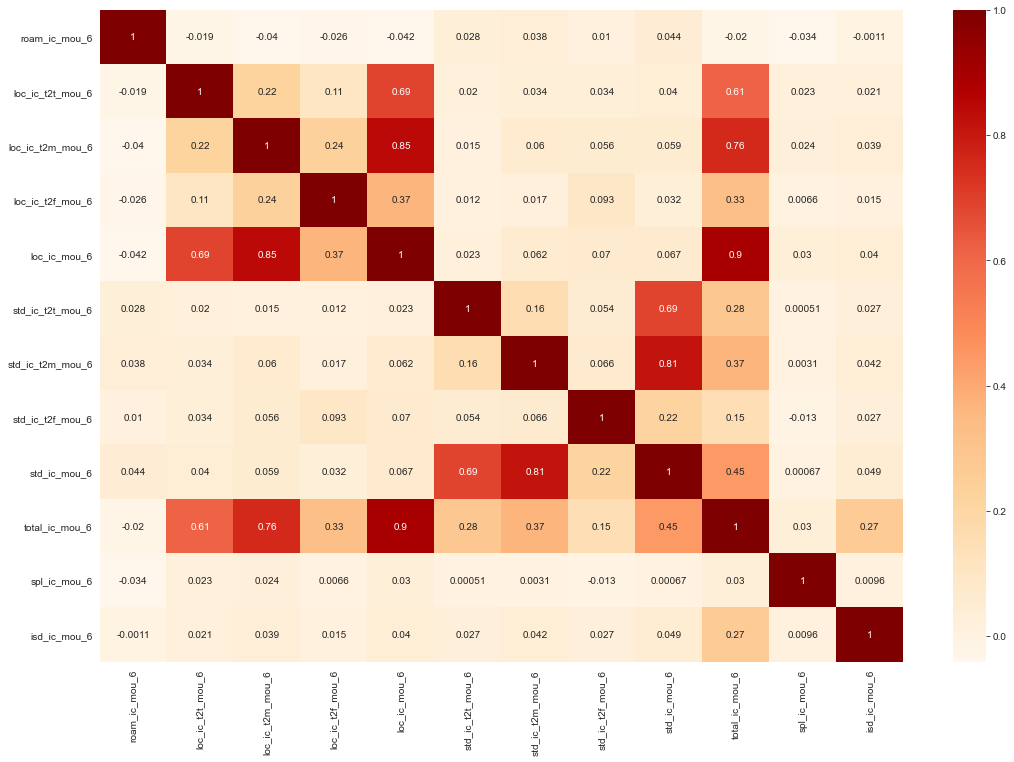

In [1296]:
mou_ic_cols6 = hv_cust.columns[hv_cust.columns.str.contains('.*_ic_.*mou_6',regex=True)]
heatmap(18,12,hv_cust.filter(mou_ic_cols6))

**Analysis:** We can see that total_ic_mou_6, std_ic_mou_6 and loc_ic_mou_6 is a combination of other variables present in dataset.So we can remove these columns for all months from the data set

In [1297]:
list_total_ic_cols = hv_cust.columns[hv_cust.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]
hv_cust.drop(list_total_ic_cols,axis=1,inplace=True)

### e. Offnet Usage

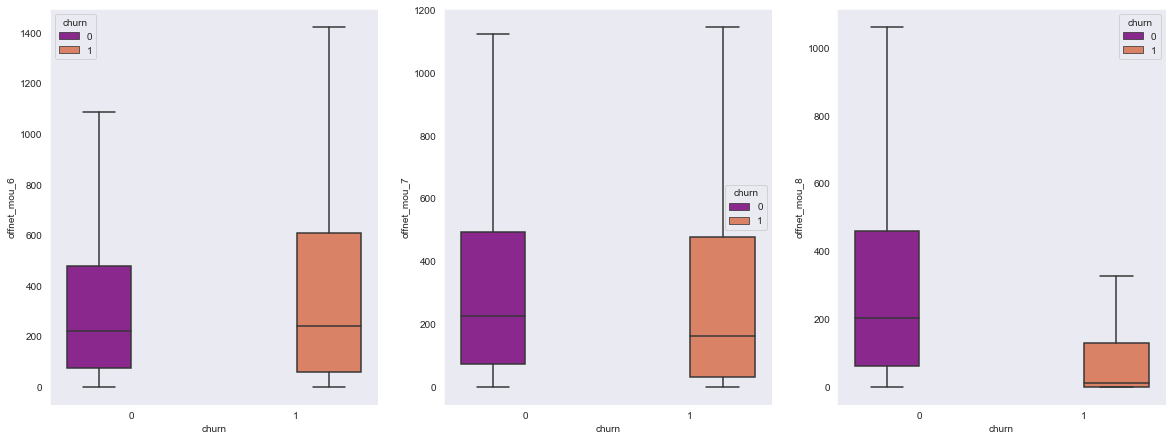

In [1298]:
offnet_usage_service_col = hv_cust.columns[hv_cust.columns.str.contains('offnet.*mou',regex=True)]
# Offnet mou values for churned and non churned customers
plot_box_chart('offnet_mou')

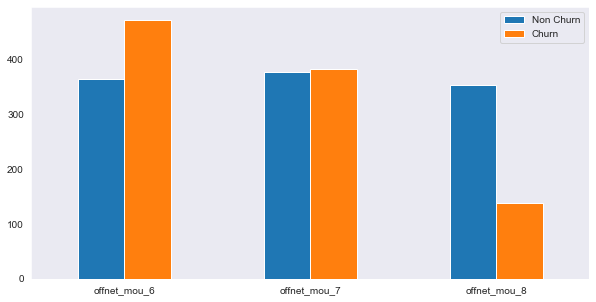

,offnet_mou_6,offnet_mou_7,offnet_mou_8
Non Churn,365.123076,377.875572,352.504090
Churn,471.950838,382.277222,138.523181


In [1299]:
plot_mean_bar_chart(hv_cust, offnet_usage_service_col)

**Analysis:** We can see the drop for offnet mou services in the 8th month

### f. ONNET : All kind of calls within the same operator network

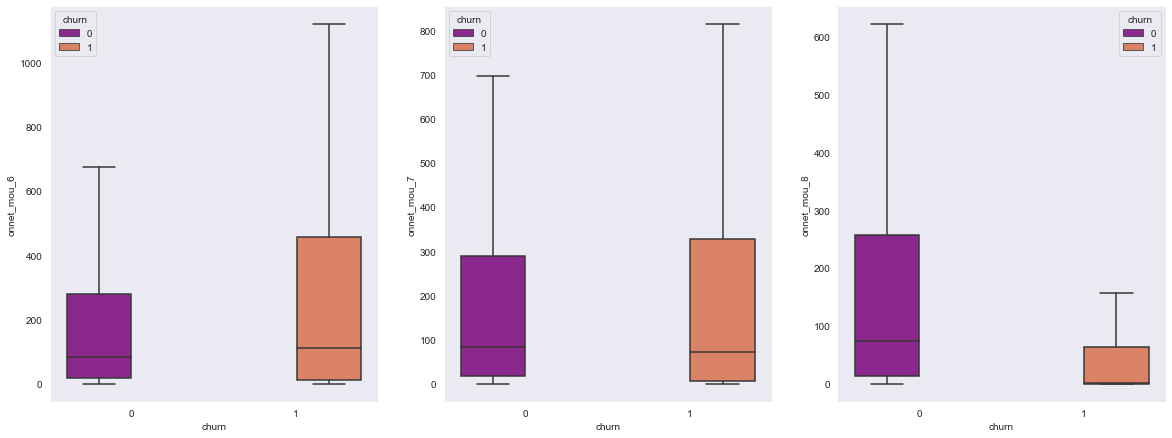

In [1300]:
#minutes of usage related columns
onnet_usage_service =  hv_cust.columns[hv_cust.columns.str.contains('^onnet.*mou',regex=True)]
# Plotting offnet
plot_box_chart('onnet_mou')

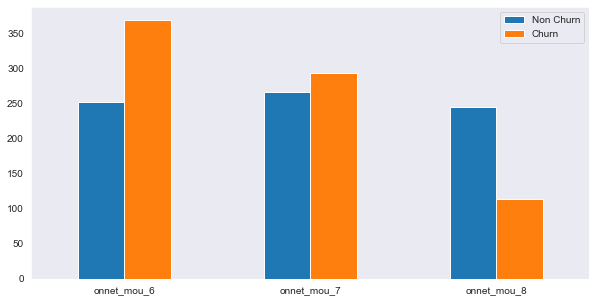

,onnet_mou_6,onnet_mou_7,onnet_mou_8
Non Churn,251.374116,265.859670,245.030935
Churn,368.659420,292.846601,113.478011


In [1301]:
plot_mean_bar_chart(hv_cust, onnet_usage_service)

**Analysis:** We also see that there is a drop in Onnet usage in the 8th month for churned customers

## Observations:

We can observe below points from above data analysis:
   1.  incoming calls were reduced in action phase i.e. in august
   2.  outgoing calls were reduced in action phase i.e. in august
   3.  total recharge amount reduced in action phase i.e. in august
   4.  total data recharge reduced in action phase i.e. in august
   5.  Reuction is not just normal but significant.
   6.  Those who churned were customers who used services for less days as compared to customers who didn't churn.
   7.  Overall most of the services that customer was using, reduced to low in action phase 8th month.

###  Lets build some Models on Train data and test it later
###  Lets first perform PCA on dataset before doing model building.

In [1302]:
#lets copy the dataframe to another before we do other activities
hv_cust_copy = hv_cust
print(hv_cust_copy.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 134 entries, last_date_of_month_6 to churn
dtypes: datetime64[ns](6), float64(99), int32(3), int64(26)
memory usage: 31.8 MB
None


In [1303]:
hv_cust_copy.shape

(29953, 134)

In [1304]:
hv_cust_copy.head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_month_rech_6,total_month_rech_7,total_month_rech_8,churn
0,2014-06-30,2014-07-31,2014-08-31,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,2014-06-21,2014-07-16,2014-08-08,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,1,1,1,252.0,252.0,252.0,614.0,504.0,504.0,1
7,2014-06-30,2014-07-31,2014-08-31,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,2014-06-27,2014-07-25,2014-08-26,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,802,57.74,19.38,18.74,0,0,0,0.0,0.0,0.0,1580.0,790.0,3638.0,1
8,2014-06-30,2014-07-31,2014-08-31,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,2014-06-25,2014-07-31,2014-08-30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.00,356.00,0.03,0.00,750.95,11.94,0.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,0.0,1.0,1.0,315,21.03,910

In [1305]:
hv_cust_copy.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_month_rech_6,total_month_rech_7,total_month_rech_8,churn
count,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.00000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000
mean,558.820058,561.160547,508.890301,260.900880,268.051744,234.345252,373.800402,378.233106,335.123008,16.124001,12.646145,12.512269,26.596033,20.155134,19.889295,84.574122,85.762835,78.153334,163.309546,163.087606,151.810056,6.348347,6.426493,5.891865,1.577380,1.888737,1.701889,165.897941,174.378166,148.587258,179.439168,187.961923,157.322964,1.806292,1.828363,1.586742,2.174995,2.109014,1.952078,5.825077,7.106715,6.549

In [1306]:
#lets remove aon column 
hv_cust_copy.drop(['aon'], axis=1, inplace=True)

In [1307]:
#lets remove datetime columns from dataset else it will give error further
datecols = list(hv_cust_copy.select_dtypes(include=['datetime']).columns)
print(datecols)
hv_cust_copy.drop(datecols, axis=1, inplace=True)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [1308]:
hv_cust_copy.shape

(29953, 127)

In [1309]:
#lets import train test split 
from sklearn.model_selection import train_test_split
X = hv_cust_copy.drop(['churn'], axis=1)
y = hv_cust_copy['churn']    
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [1310]:
# lets check the shape of each dataset
print("Shape of X_train : " ,X_train.shape)
print("Shape of y_train : " ,y_train.shape)
print("Shape of X_test : " ,X_test.shape)
print("Shape of y_test : " ,y_test.shape)

Shape of X_train :  (20967, 126)
Shape of y_train :  (20967,)
Shape of X_test :  (8986, 126)
Shape of y_test :  (8986,)


In [1311]:
#perform minmax scaling before PCA
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [1312]:
# fit transform the scaler on train
X_train = scaler.fit_transform(X_train)
# transform test using the already fit scaler
X_test = scaler.transform(X_test)

In [1313]:
#lets print the stats before sampling
print("counts of label '1':",sum(y_train==1))
print("counts of label '0':",sum(y_train==0))

counts of label '1': 1752
counts of label '0': 19215


In [1314]:
!pip install imbalanced-learn==0.6.0

In [1315]:
#perform oversampling using smote
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_train_smo, y_train_smo = sm.fit_sample(X_train, y_train)

In [1316]:
#lets print stats after smote
print("counts of label '1':",sum(y_train_smo==1))
print("counts of label '0':",sum(y_train_smo==0))


counts of label '1': 19215
counts of label '0': 19215


In [1317]:
#lets perform PCA on sampled data. import PCA
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [1318]:
#lets fit PCA on the train dataset
pca.fit(X_train_smo)

PCA(random_state=42, svd_solver='randomized')

In [1319]:
pca.explained_variance_ratio_[:50]

array([5.83177344e-01, 1.32198683e-01, 9.19722035e-02, 2.32482833e-02,
       1.80579576e-02, 1.37435866e-02, 1.26624769e-02, 1.19680548e-02,
       8.82254450e-03, 8.35435573e-03, 7.15067968e-03, 6.59309551e-03,
       5.04745013e-03, 4.57421945e-03, 4.31478795e-03, 4.13580376e-03,
       4.01661383e-03, 3.47035772e-03, 2.93650504e-03, 2.82321728e-03,
       2.65113625e-03, 2.46647909e-03, 2.42783805e-03, 2.35836983e-03,
       2.19405382e-03, 2.04985756e-03, 2.00122168e-03, 1.86277934e-03,
       1.59473934e-03, 1.51665915e-03, 1.46055266e-03, 1.36651886e-03,
       1.31207982e-03, 1.28562189e-03, 1.26268462e-03, 1.23235850e-03,
       1.14739680e-03, 1.13960602e-03, 1.05331980e-03, 9.82573504e-04,
       8.35497823e-04, 8.05867075e-04, 7.69003870e-04, 7.15785941e-04,
       6.84516703e-04, 6.60729697e-04, 5.87153463e-04, 5.79521137e-04,
       5.54924185e-04, 4.96985151e-04])

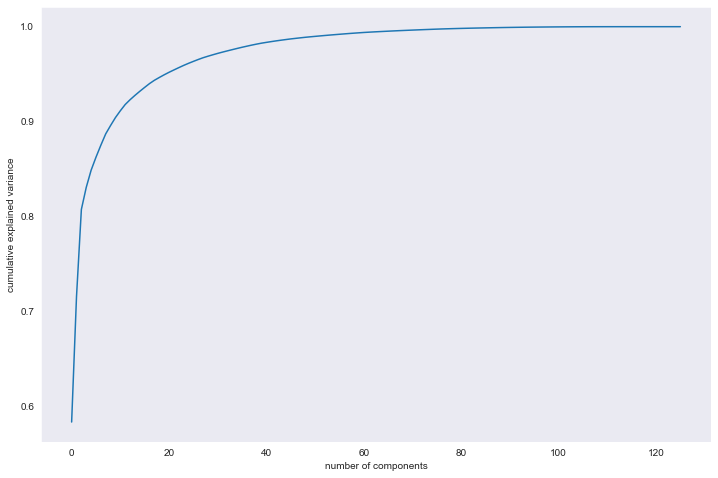

In [1320]:
#lets draw screeplot in between cumulative variance and number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Plot shows that 35 components are enough to explain close to 95% variance

In [1321]:
#lets perform incremental PCA for efficiency 
from sklearn.decomposition import IncrementalPCA
pca_again = IncrementalPCA(n_components=35)

In [1322]:
#fit
X_train_pca = pca_again.fit_transform(X_train_smo)
X_train_pca.shape

(38430, 35)

In [1323]:
#lets create correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
#correlations are close to 0

max corr: 0.012639017973522635 , min corr:  -0.022194983874597153


### Modeling : Logistic Regression

In [1324]:
#Applying selected components to the test data - 35 components
X_test_pca = pca_again.transform(X_test)
X_test_pca.shape

(8986, 35)

In [1325]:
#import library and fit train model on train data
#class_weight="balanced":it basically means replicating the smaller class until you have as many samples as in the larger one, 
#but in an implicit way.Though we have already used smote but here we can use this too.
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train_pca,y_train_smo)

LogisticRegression(class_weight='balanced')

In [1326]:
#Predict on training set
dtrain_predictions = lr.predict(X_train_pca)
dtrain_predprob = lr.predict_proba(X_train_pca)[:,1]

In [1327]:
#lets print some score
print("---Training Dataset------ ")
print ("Accuracy :",metrics.accuracy_score(y_train_smo, dtrain_predictions))
print ("Recall/Sensitivity :",metrics.recall_score(y_train_smo, dtrain_predictions))
print ("AUC Score (Train):",metrics.roc_auc_score(y_train_smo, dtrain_predictions))

---Training Dataset------ 
Accuracy : 0.8163934426229508
Recall/Sensitivity : 0.8376788966952902
AUC Score (Train): 0.8163934426229509


In [1328]:
#lets predict on test dataset.
#print all scores
print("---Test Dataset------ ")
pred_probs_test = lr.predict(X_test_pca)
print("Accuracy :",(metrics.accuracy_score(y_test,pred_probs_test)))
print('Sensitivity/Recall :',metrics.recall_score(y_test, pred_probs_test))
print("Roc_auc_score :",(metrics.roc_auc_score(y_test, pred_probs_test)))

---Test Dataset------ 
Accuracy : 0.7880035610950368
Sensitivity/Recall : 0.8105726872246696
Roc_auc_score : 0.798362803576212


In [1329]:
y_train_pred = lr.predict_proba(X_train_pca)[:,1]
y_train_pred_final = pd.DataFrame({'Churn':y_train_smo, 'Churn_Prob':y_train_pred})
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.445116,0
1,0,0.813900,1
2,0,0.225557,0
3,0,0.148671,0
4,0,0.060091,0


In [1330]:
#lets define function for ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

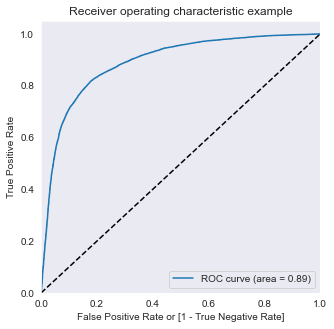

In [1331]:
#lets draw roc curve
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [1332]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.445116,0,1,1,1,1,1,0,0,0,0,0
1,0,0.813900,1,1,1,1,1,1,1,1,1,1,0
2,0,0.225557,0,1,1,1,0,0,0,0,0,0,0
3,0,0.148671,0,1,1,0,0,0,0,0,0,0,0
4,0,0.060091,0,1,0,0,0,0,0,0,0,0,0


In [1333]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.500000     1.000000     0.000000
0.1   0.1  0.652849     0.980796     0.324902
0.2   0.2  0.725267     0.958262     0.492272
0.3   0.3  0.769763     0.926464     0.613063
0.4   0.4  0.798074     0.885142     0.711007
0.5   0.5  0.816393     0.837679     0.795108
0.6   0.6  0.814546     0.764767     0.864325
0.7   0.7  0.796799     0.680042     0.913557
0.8   0.8  0.736196     0.518605     0.953786
0.9   0.9  0.574421     0.160968     0.987874


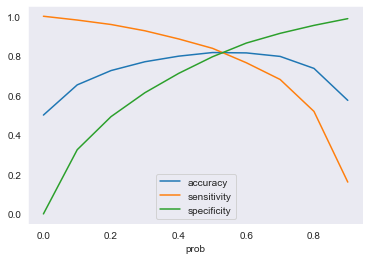

In [1334]:
#lets plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

### From the curve above, 0.5 is the optimum point to take it as a cutoff probability.

In [1335]:
#apply cutoff probability
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.445116,0,1,1,1,1,1,0,0,0,0,0,0
1,0,0.813900,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.225557,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.148671,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.060091,0,1,0,0,0,0,0,0,0,0,0,0


In [1336]:
#lets predict on train dataset with optimal cutoff probability
y_train_pred = lr.predict_proba(X_train_pca)[:,1]
y_train_pred_final = pd.DataFrame({'Churn':y_train_smo, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.445116,0
1,0,0.813900,1
2,0,0.225557,0
3,0,0.148671,0
4,0,0.060091,0


In [1337]:
#lets find out all scores of train dataset
#print all scores
print("---Training Dataset with optimal cutoff value as 0.5------ ")
print ("Accuracy :",metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final['predicted']))
print ("Recall/Sensitivity :",metrics.recall_score(y_train_pred_final.Churn, y_train_pred_final['predicted']))
print ("AUC Score (Train):",metrics.roc_auc_score(y_train_pred_final.Churn, y_train_pred))

---Training Dataset with optimal cutoff value as 0.5------ 
Accuracy : 0.8163934426229508
Recall/Sensitivity : 0.8376788966952902
AUC Score (Train): 0.8899567455357629


In [1338]:
#lets predict on test datset with optimal cutoff obtained earlier
y_test_pred = lr.predict_proba(X_test_pca)[:,1]
y_test_pred_final = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_pred})
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

,Churn,Churn_Prob,predicted
48388,0,0.136299,0
29754,0,0.063740,0
50131,0,0.075468,0
66630,0,0.353066,0
91920,0,0.086962,0


In [1339]:
#lets find out all scores of train dataset
#print all scores
print("---Test  Dataset with optimal cutoff value as 0.5------ ")
print ("Accuracy :",metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final['predicted']))
print ("Recall/Sensitivity :",metrics.recall_score(y_test_pred_final.Churn, y_test_pred_final['predicted']))
print ("AUC Score (Train):",metrics.roc_auc_score(y_test_pred_final.Churn, y_test_pred))

---Test  Dataset with optimal cutoff value as 0.5------ 
Accuracy : 0.7880035610950368
Recall/Sensitivity : 0.8105726872246696
AUC Score (Train): 0.869997109113718


As you can see above stats with logistics regression 

Test Dataset is:<br>
Sensitivity/Recall : 0.81<br>
Accuracy: 0.78<br>

Stats On Train dataset was:<br>
Sensitivity/Recall : 0.84<br>
Accuracy: 0.82<br>

## Lets apply Random forest Modeling

## Tuning max_depth

In [1340]:
# GridSearchCV to find optimal n_estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [1341]:
def tune_hyperparameter(parameters,x_train,y_train,n_folds = 5,max_depth=0):
    
    if(max_depth==0):
        rf = RandomForestClassifier()
    else :
        rf = RandomForestClassifier(max_depth=max_depth)
        
    rf = GridSearchCV(rf, parameters, cv=n_folds,n_jobs = -1, scoring="accuracy",return_train_score=True)
    rf.fit(x_train, y_train)
    scores = rf.cv_results_

    for key in parameters.keys():
        hyperparameters = key
        break

    # plotting accuracies for parameters
    plt.figure(figsize=(16,5))
    plt.plot(scores["param_"+hyperparameters], scores["mean_train_score"], label="training accuracy")
    plt.plot(scores["param_"+hyperparameters], scores["mean_test_score"], label="test accuracy")
    plt.xlabel(hyperparameters)
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

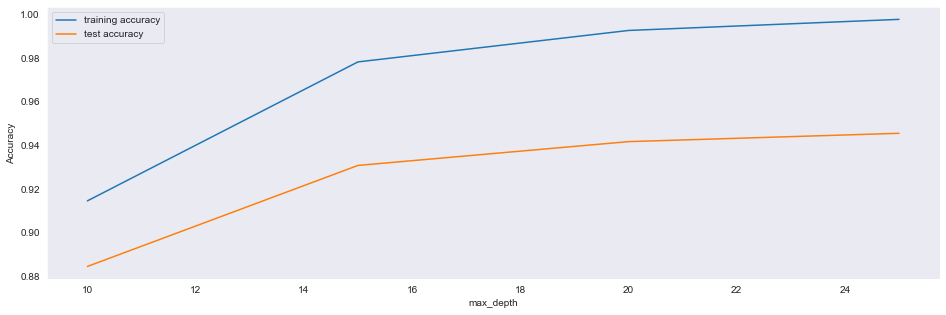

In [1342]:
# parameters to build the model on
parameters = {'max_depth': range(10, 30, 5)}
tune_hyperparameter(parameters,X_train_pca,y_train_smo)

### Max_Depth = 15 Looks good

## Tuning n_estimators

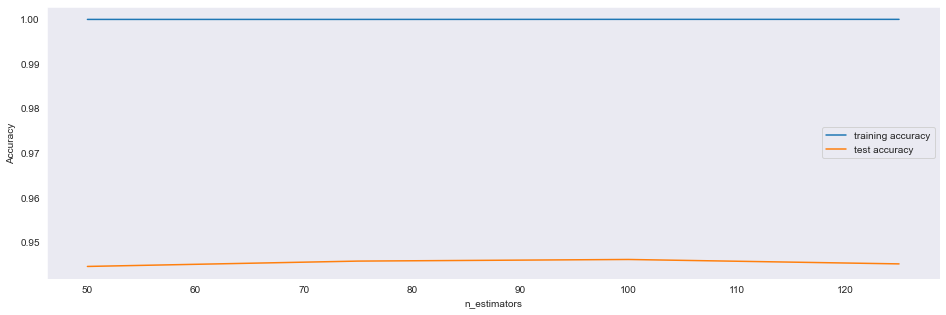

In [1343]:
parameters = {'n_estimators': range(50, 150, 25)}
tune_hyperparameter(parameters,X_train_pca,y_train_smo)

### n_estimators = 80 Looks good

### Tuning max_features

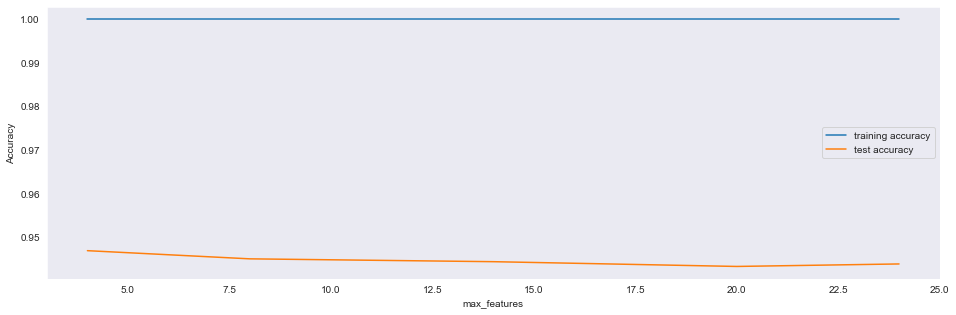

In [1344]:
# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}
tune_hyperparameter(parameters,X_train_pca,y_train_smo)

### max_features = 8 looks good

## Tuning min_samples_leaf

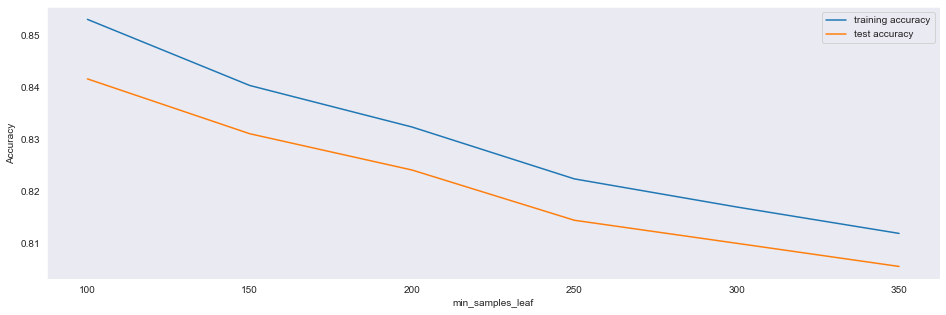

In [1345]:
# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}
tune_hyperparameter(parameters,X_train_pca,y_train_smo)

### min_samples_leaf = 100 looks good

## Tuning min_samples_split

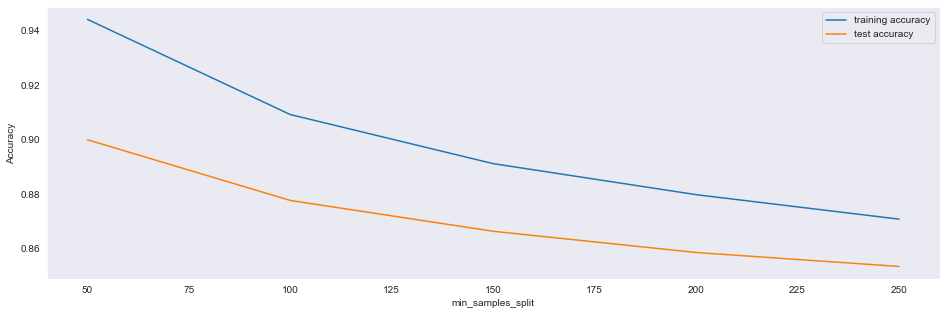

In [1346]:
# parameters to build the model on
parameters = {'min_samples_split': range(50, 300, 50)}
tune_hyperparameter(parameters,X_train_pca,y_train_smo)

### min_samples_split = 50 looks good

## Fitting the final model with the best parameters obtained.

In [1347]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=15,
                             min_samples_leaf=100, 
                             min_samples_split=50,
                             max_features=8,
                             n_estimators=80,
                             random_state=10)

In [1348]:
# fit
rf_pca=rfc.fit(X_train_pca,y_train_smo)
#Predict on training set
rtrain_predictions = rf_pca.predict(X_train_pca)
rtrain_predprob = rf_pca.predict_proba(X_train_pca)[:,1]

In [1349]:
#lets print some scores
print("-------------Training Dataset-------------")
print ("Accuracy :",metrics.accuracy_score(y_train_smo, rtrain_predictions))
print ("Recall/Sensitivity :",metrics.recall_score(y_train_smo, rtrain_predictions))
print ("AUC Score (Train):",metrics.roc_auc_score(y_train_smo, rtrain_predprob))

-------------Training Dataset-------------
Accuracy : 0.8582617746552172
Recall/Sensitivity : 0.8544366380431955
AUC Score (Train): 0.9345878719170588


In [1350]:
#lets predict on test dataset
pred_probs_test = rf_pca.predict(X_test_pca)
print("-------------test Dataset-------------")
print ("Accuracy :",metrics.accuracy_score(y_test, pred_probs_test))
print ("Recall/Sensitivity :",metrics.recall_score(y_test, pred_probs_test))
print ("AUC Score (Train):",metrics.roc_auc_score(y_test, pred_probs_test))

-------------test Dataset-------------
Accuracy : 0.8341865123525484
Recall/Sensitivity : 0.7591776798825257
AUC Score (Train): 0.7997574130899684


In [1351]:
#lets check with probability cutoff 0.5
y_train_predrf = rf_pca.predict_proba(X_train_pca)[:,1]
y_train_predrf_final = pd.DataFrame({'Churn':y_train_smo, 'Churn_Prob':y_train_predrf})
y_train_predrf_final['Churn_Prob'] = y_train_predrf
y_train_predrf_final['predicted'] = y_train_predrf_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_predrf_final.head()

,Churn,Churn_Prob,predicted
0,0,0.431576,0
1,0,0.877976,1
2,0,0.226056,0
3,0,0.139376,0
4,0,0.115544,0


In [1352]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_predrf_final[i]= y_train_predrf_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_predrf_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.431576,0,1,1,1,1,1,0,0,0,0,0
1,0,0.877976,1,1,1,1,1,1,1,1,1,1,0
2,0,0.226056,0,1,1,1,0,0,0,0,0,0,0
3,0,0.139376,0,1,1,0,0,0,0,0,0,0,0
4,0,0.115544,0,1,1,0,0,0,0,0,0,0,0


In [1353]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_predrf_final.Churn, y_train_predrf_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.586729  0.999740  0.173718
0.2   0.2  0.726073  0.992662  0.459485
0.3   0.3  0.809316  0.965079  0.653552
0.4   0.4  0.849336  0.915535  0.783138
0.5   0.5  0.858262  0.854437  0.862087
0.6   0.6  0.842337  0.769347  0.915327
0.7   0.7  0.795446  0.636066  0.954827
0.8   0.8  0.722977  0.463024  0.982930
0.9   0.9  0.595446  0.193443  0.997450


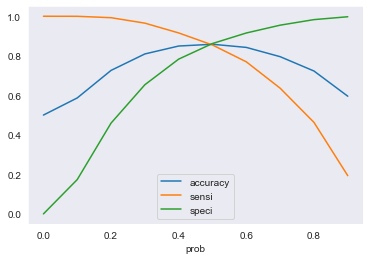

In [1354]:
#lets plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### rom the curve above, 0.5 is the optimum point to take it as a cutoff probability

In [1355]:
#apply cutoff probability
y_train_predrf_final['final_predicted'] = y_train_predrf_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
#lets predict on train dataset with optimal cutoff probability
y_train_predrf = rf_pca.predict_proba(X_train_pca)[:,1]
y_train_predrf_final = pd.DataFrame({'Churn':y_train_smo, 'Churn_Prob':y_train_predrf})
y_train_predrf_final['Churn_Prob'] = y_train_predrf
y_train_predrf_final['predicted'] = y_train_predrf_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_predrf_final.head()

,Churn,Churn_Prob,predicted
0,0,0.431576,0
1,0,0.877976,1
2,0,0.226056,0
3,0,0.139376,0
4,0,0.115544,0


In [1356]:
#lets find out all scores of train dataset
#print all scores
print("---Training Dataset with optimal cutoff value as 0.5------ ")
print ("Accuracy :",metrics.accuracy_score(y_train_predrf_final.Churn, y_train_predrf_final['predicted']))
print ("Recall/Sensitivity :",metrics.recall_score(y_train_predrf_final.Churn, y_train_predrf_final['predicted']))
print ("AUC Score (Train):",metrics.roc_auc_score(y_train_predrf_final.Churn, y_train_predrf))

---Training Dataset with optimal cutoff value as 0.5------ 
Accuracy : 0.8582617746552172
Recall/Sensitivity : 0.8544366380431955
AUC Score (Train): 0.9345878719170588


In [1357]:
#lets predict on test datset with optimal cutoff obtained earlier
y_test_predrf = rf_pca.predict_proba(X_test_pca)[:,1]
y_test_predrf_final = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_predrf})
y_test_predrf_final['Churn_Prob'] = y_test_predrf
y_test_predrf_final['predicted'] = y_test_predrf_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_predrf_final.head()

,Churn,Churn_Prob,predicted
48388,0,0.381728,0
29754,0,0.041190,0
50131,0,0.107422,0
66630,0,0.355213,0
91920,0,0.208979,0


In [1358]:
#lets find out all scores of test dataset
print("---Test Dataset with optimal cutoff value as 0.5------ ")
print ("Accuracy :",metrics.accuracy_score(y_test_predrf_final.Churn, y_test_predrf_final['predicted']))
print ("Recall/Sensitivity :",metrics.recall_score(y_test_predrf_final.Churn, y_test_predrf_final['predicted']))
print ("AUC Score (Train):",metrics.roc_auc_score(y_test_predrf_final.Churn, y_test_predrf))

---Test Dataset with optimal cutoff value as 0.5------ 
Accuracy : 0.8341865123525484
Recall/Sensitivity : 0.7591776798825257
AUC Score (Train): 0.8732985542916402


#### Train and test Recall score of Random forest:<br>
Train Sensitivity/Recall:0.85<br>
Test Sensitivity/Recall:0.76<br>

#### Train and test Recall score with logistics regression :<br>
Train Sensitivity/Recall: 0.84<br>
Test Sensitivity/Recall : 0.81<br>

1. Recall/Sensitivity score need to be considered in this case study as Telecom company will not like any high value customer to churn so will try to find out all high value customers who may leave in future. Company may willing to even bear burden of few customers who may not churn but will be classified as churn. 
##### so overall recall score will be considered for good model. Logistics Regression will be chosen in this case.
2. Difference in between Train and test score is less for Logistics Regression which seems model is stable.

## Build another model with the main objective of identifying important predictor attributes which help the business understand indicators of churn.

### Will use Random Forest in this case

### Fitting the final model with the best parameters obtained

In [1359]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=15,
                             min_samples_leaf=100, 
                             min_samples_split=50,
                             max_features=8,
                             n_estimators=80)

In [1360]:
# fit
rfc.fit(X_train_smo,y_train_smo)

RandomForestClassifier(max_depth=15, max_features=8, min_samples_leaf=100,
                       min_samples_split=50, n_estimators=80)

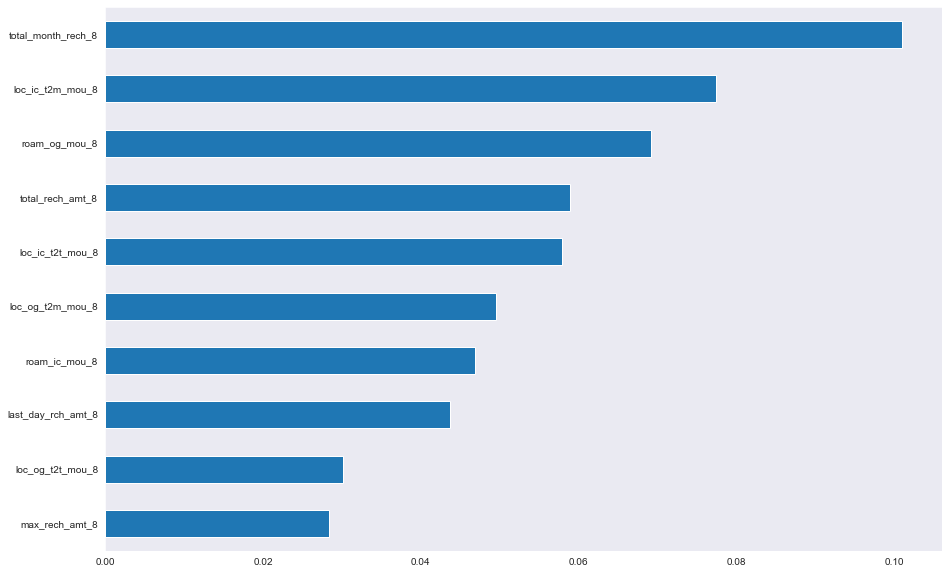

In [1361]:
plt.figure(figsize=(15,10))
impo_features = pd.Series(rfc.feature_importances_, index=X.columns)
impo_features.nlargest((10)).sort_values().plot(kind='barh', align='center')
plt.show()

##### We could see from above plot that almost all the features of top 10 most important features are from action phase that is August month. Hence we need to focus on these features to identify high value customers who may churn in future.
##### Lets look into some of the features<br>
1. total_month_rech_8 : Total recharge amount in 8th month<br>
2. loc_ic_t2m_mou_8 : Local Incoming calls Operator T to other operator mobile Minutes of usage - voice calls in 8th Month<br>
3. roam_og_mou_8 : Roaming outgoing calls Minutes of usage - voice calls in 8th Month<br>
4. total_rech_amt_8 : Total recharge amount in 8th month<br>
5. loc_ic_t2t_mou_8: Local Incoming calls within same operator mobile Minutes of usage - voice calls in 8th Month<br>
6. loc_og_t2m_mou_8: Local Outgoing calls within same operator mobile Minutes of usage - voice calls in 8th Month<br>
7. roam_ic_mou_8 : Roaming incoming calls Minutes of usage - voice calls in 8th Month<br>
8. last_day_rch_amt_8 : Last recharge amount in 8th month.<br>
9. loc_og_t2t_mou_8: Local Outgoing calls Operator T to other operator mobile Minutes of usage - voice calls in 8th Month<br>
10. max_rech_amt_8 : Max recharge amount in 8th month<br>

**Recommend strategies and Suggestions:**
> Important factors that Telecom compnay should monitor is already mentioned above.

1. Number of Incoming and outgoing calls from a mobile number in particular month by customer. If number of calls starts reducing then it may be sign of customer trying to switch from one netwrok to another network or he is has already switched and using current netwrok for few days.

2. Recharge amount is very important factor to notice if it starts reducing month by month then it need to be looked as cutomer may not be happy with the services he is getting that is why he started recharging with less amount.

3. If data usage starts decreasing and in august month it is minimal then it shows customer is not getting good spped of internet.

4. If internet speed that customer is getting is good, customer will finsh data soon and recharge it again but if network is poor and speed is not good then customer will not be able to finish it and will not recharge it multiple times. so need to look into areas where network is poor and customer care is receiving complaints multiple times.

5. if all kinds of call and data usage reduces then it is serious concern as customer may be planning to churn and just timepassing for few more days. so company need to look into these ares.

6. if customer is using the services for incoming calls only and has stopped using outgoing calls then he is finding the services very costly and may switch to network where incoming and outgoing services are in reasonable rate.